In [30]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegCustom:
    def __init__(self,lr=0.5):
        self.lr=lr
    def fit(self ,X,y):
        self._X=X
        self._y=y.reshape(-1,1)
        self.coef_=np.random.random()
        self.intercept_ = np.random.random()
        errors=[]
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors

    def gradient_decend(self):
        d_coef , d_intercept = self.gradient()
        self.coef_ -= d_coef*self.lr
        self.intercept_ -= d_intercept*self.lr

    def gradient(self):
        yh = self.predict(self._X)
        d_coef = ((yh- self._y)*self._X).mean()
        d_intercept = (yh - self._y).mean()
        return d_coef , d_intercept

    def predict(self,X):
        return X*self.coef_ + self.intercept_

    def error(self):
        return ((self.predict(self._X) - self._y) **2).sum()
        

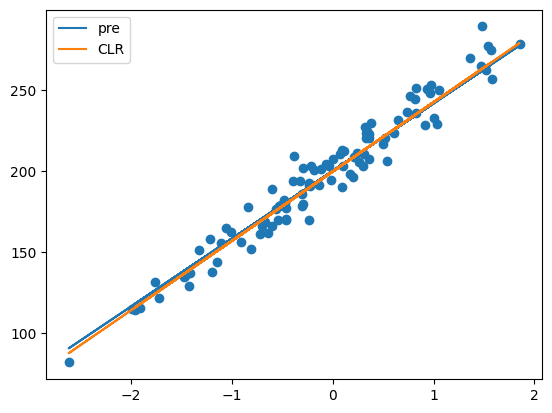

In [36]:
from sklearn.datasets import make_regression
bias= 200
X,y ,coef = make_regression(n_features=1,noise = 10 ,bias = bias, random_state=42 , coef =True)
y_gen = X*coef + bias
model = LinearRegCustom(lr=.1)
errors = model.fit(X,y)
model.coef_ , model.intercept_
plt.scatter(X,y)
plt.plot(X,y_gen ,label="pre")
plt.plot(X,model.predict(X),label="CLR")
plt.legend()